In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
import pandas as pd

# Reemplaza 'nombre_archivo.csv' con el nombre de tu archivo CSV
archivo_csv = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Penetracion-totales.csv'

# Carga el archivo CSV en un DataFrame
df_Penetracion_totales = pd.read_csv(archivo_csv)

# Muestra las primeras 5 filas del DataFrame
print(f"Mostrando las primeras 5 filas de {archivo_csv}:")
print(df_Penetracion_totales.head())

Mostrando las primeras 5 filas de C:/Users/Usuario/PI_2/DATA_LIMPIO/Penetracion-totales.csv:
    Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2024          2                         78.13                     24.57   
1  2024          1                         78.89                     24.79   
2  2023          4                         78.56                     24.66   
3  2023          3                         77.84                     24.41   
4  2023          2                         77.02                     24.14   

         Periodo  
0   Abr-Jun 2024  
1   Ene-Mar 2024  
2   Oct-Dic 2023  
3  Jul-Sept 2023  
4   Abr-Jun 2023  


In [5]:
# Verificación de la estructura del DataFrame
print("\nInformación general del DataFrame:")
print(df_Penetracion_totales.info())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB
None


In [6]:
# Verificar valores nulos
print("\nNúmero de valores nulos por columna:")
print(df_Penetracion_totales.isnull().sum())


Número de valores nulos por columna:
Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64


In [7]:
# Verificación de valores negativos en columnas numéricas
print("\nValores negativos en columnas numéricas:")
print(df_Penetracion_totales.select_dtypes(include=['float64', 'int64']).lt(0).sum())



Valores negativos en columnas numéricas:
Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
dtype: int64


In [8]:
# Descripción estadística
print("\nDescripción estadística del DataFrame:")
print(df_Penetracion_totales.describe())


Descripción estadística del DataFrame:
               Año  Trimestre  Accesos por cada 100 hogares  \
count    42.000000  42.000000                     42.000000   
mean   2018.761905   2.452381                     63.201813   
std       3.074756   1.130560                      9.950321   
min    2014.000000   1.000000                     49.545821   
25%    2016.000000   1.250000                     53.784644   
50%    2019.000000   2.000000                     62.667764   
75%    2021.000000   3.000000                     72.527011   
max    2024.000000   4.000000                     78.890000   

       Accesos por cada 100 hab  
count                 42.000000  
mean                  19.574600  
std                    3.268665  
min                   15.050104  
25%                   16.519507  
50%                   19.395586  
75%                   22.603664  
max                   24.790000  


In [9]:
import pandas as pd
# 1. Convertir 'Año' a tipo fecha
# Esto convierte la columna 'Año' a un tipo de dato datetime (aunque solo contiene el año, lo hacemos para manipularlo mejor)
df_Penetracion_totales['Año'] = pd.to_datetime(df_Penetracion_totales['Año'], format='%Y').dt.year


In [10]:
import pandas as pd

# Cargar el archivo CSV
archivo_csv = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Penetracion-totales.csv'
df_Penetracion_totales = pd.read_csv(archivo_csv)

# 1. Convertir 'Año' a tipo fecha (aunque solo contiene el año)
df_Penetracion_totales['Año'] = pd.to_datetime(df_Penetracion_totales['Año'], format='%Y').dt.year

# 2. Convertir 'Trimestre' a tipo periodo trimestral
# Primero, aseguramos que 'Trimestre' esté en el formato adecuado 'YYYYQX' (por ejemplo, '2024Q1', '2024Q2')
df_Penetracion_totales['Trimestre'] = df_Penetracion_totales['Trimestre'].astype(str)

# Aseguramos que 'Trimestre' tenga el formato correcto 'YYYYQX'
df_Penetracion_totales['Trimestre'] = df_Penetracion_totales['Trimestre'].apply(lambda x: f"{x[:4]}Q{x[-1]}")

# Convertir la columna 'Trimestre' a tipo periodo trimestral usando PeriodIndex
df_Penetracion_totales['Trimestre'] = pd.to_datetime(df_Penetracion_totales['Trimestre'].str.replace('Q', 'Q-')).dt.to_period('Q')

# 3. Filtrar datos entre 2018 y 2024
df_Penetracion_totales = df_Penetracion_totales[(df_Penetracion_totales['Año'] >= 2018) & (df_Penetracion_totales['Año'] <= 2024)]

# Ver el DataFrame después de las transformaciones
print(df_Penetracion_totales.head())

# Verificar los valores únicos después de las transformaciones
print("\nValores únicos en columnas clave después del ajuste:")
print(f"Año: {df_Penetracion_totales['Año'].nunique()} valores únicos")
print(f"Trimestre: {df_Penetracion_totales['Trimestre'].nunique()} valores únicos")


    Año Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2024    1998Q2                         78.13                     24.57   
1  2024    1999Q1                         78.89                     24.79   
2  2023    1996Q4                         78.56                     24.66   
3  2023    1997Q3                         77.84                     24.41   
4  2023    1998Q2                         77.02                     24.14   

         Periodo  
0   Abr-Jun 2024  
1   Ene-Mar 2024  
2   Oct-Dic 2023  
3  Jul-Sept 2023  
4   Abr-Jun 2023  

Valores únicos en columnas clave después del ajuste:
Año: 7 valores únicos
Trimestre: 4 valores únicos


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1452\1875823942.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Penetracion_totales['Trimestre'] = pd.to_datetime(df_Penetracion_totales['Trimestre'].str.replace('Q', 'Q-')).dt.to_period('Q')


In [11]:


# 3. Filtrar datos entre 2018 y 2024
df_Penetracion_totales = df_Penetracion_totales[(df_Penetracion_totales['Año'] >= 2018) & (df_Penetracion_totales['Año'] <= 2024)]

# Ver el DataFrame después de las transformaciones
print(df_Penetracion_totales.head())

# Verificar los valores únicos después de las transformaciones
print("\nValores únicos en columnas clave después del ajuste:")
print(f"Año: {df_Penetracion_totales['Año'].nunique()} valores únicos")
print(f"Trimestre: {df_Penetracion_totales['Trimestre'].nunique()} valores únicos")


    Año Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2024    1998Q2                         78.13                     24.57   
1  2024    1999Q1                         78.89                     24.79   
2  2023    1996Q4                         78.56                     24.66   
3  2023    1997Q3                         77.84                     24.41   
4  2023    1998Q2                         77.02                     24.14   

         Periodo  
0   Abr-Jun 2024  
1   Ene-Mar 2024  
2   Oct-Dic 2023  
3  Jul-Sept 2023  
4   Abr-Jun 2023  

Valores únicos en columnas clave después del ajuste:
Año: 7 valores únicos
Trimestre: 4 valores únicos


In [12]:
print(df_Penetracion_totales.columns)


Index(['Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo'],
      dtype='object')


In [13]:
df_Penetracion_totales.columns = df_Penetracion_totales.columns.str.strip()


In [14]:
# Verificar si existen valores negativos (si las columnas son numéricas)
print("\nValores negativos en las columnas numéricas:")
print(df_Penetracion_totales[df_Penetracion_totales.select_dtypes(include=['number']).lt(0).any(axis=1)])



Valores negativos en las columnas numéricas:
Empty DataFrame
Columns: [Año, Trimestre, Accesos por cada 100 hogares, Accesos por cada 100 hab, Periodo]
Index: []


In [15]:
# Filtrar solo las columnas numéricas para el cálculo de la media
numerical_columns = df_Penetracion_totales.select_dtypes(include=['number']).columns

# Rellenar valores nulos en las columnas numéricas con la media de la columna
df_Penetracion_totales[numerical_columns] = df_Penetracion_totales[numerical_columns].fillna(df_Penetracion_totales[numerical_columns].mean())


<Figure size 1200x800 with 0 Axes>

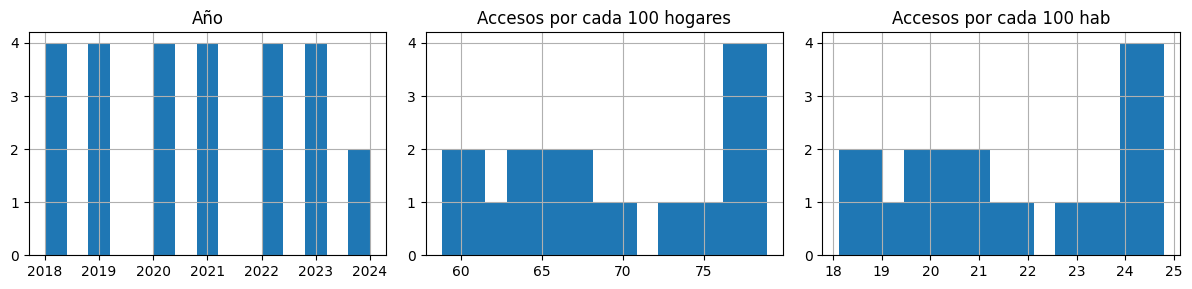

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de los gráficos
plt.figure(figsize=(12, 8))

# Crear un histograma para cada columna numérica
df_Penetracion_totales.select_dtypes(include=['number']).hist(bins=15, figsize=(12, 8), layout=(3, 3))
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1452\3443954105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_Penetracion_totales, x='Trimestre', palette='Set2')


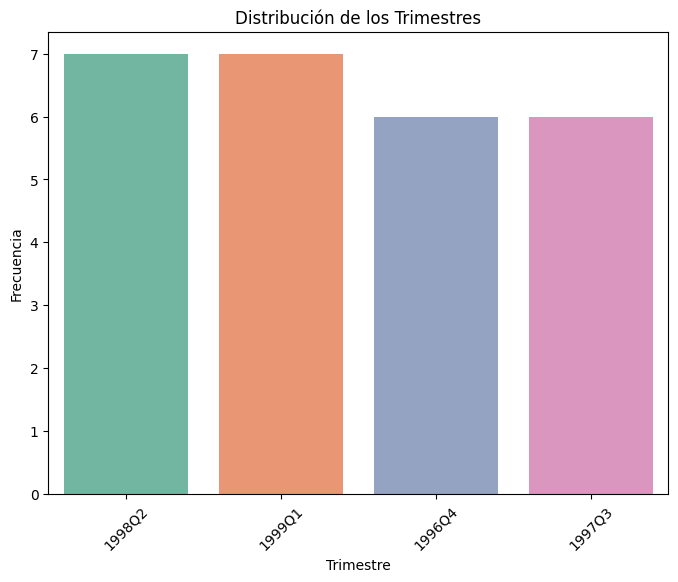

In [17]:
# Gráfico de barras para ver la frecuencia de los trimestres
plt.figure(figsize=(8, 6))
sns.countplot(data=df_Penetracion_totales, x='Trimestre', palette='Set2')
plt.title('Distribución de los Trimestres')
plt.xlabel('Trimestre')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1452\1753270179.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_Penetracion_totales, x='Año', palette='Set1')


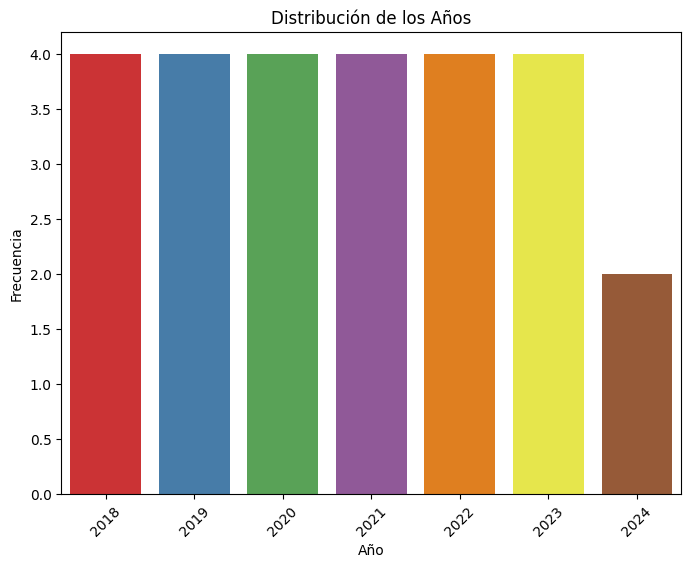

In [18]:
# Gráfico de barras para el año (si aplica)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_Penetracion_totales, x='Año', palette='Set1')
plt.title('Distribución de los Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


In [19]:
# Mostrar los nombres de las columnas del DataFrame
print(df_Penetracion_totales.columns)


Index(['Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo'],
      dtype='object')


In [20]:
# Verificar los tipos de las columnas
print(df_Penetracion_totales.dtypes)


Año                                     int32
Trimestre                       period[Q-DEC]
Accesos por cada 100 hogares          float64
Accesos por cada 100 hab              float64
Periodo                                object
dtype: object


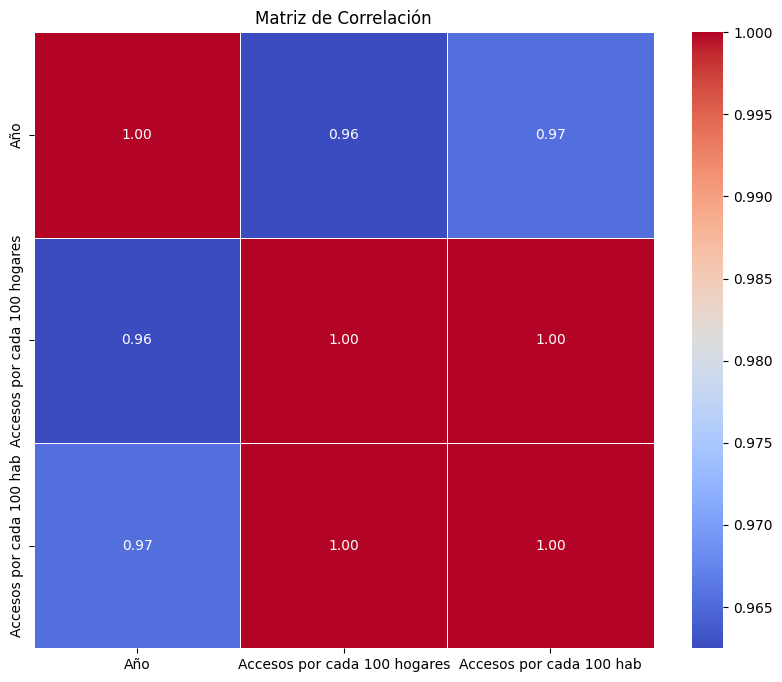

In [21]:
# Seleccionar solo columnas numéricas
df_numerico = df_Penetracion_totales.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

# Configurar el gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


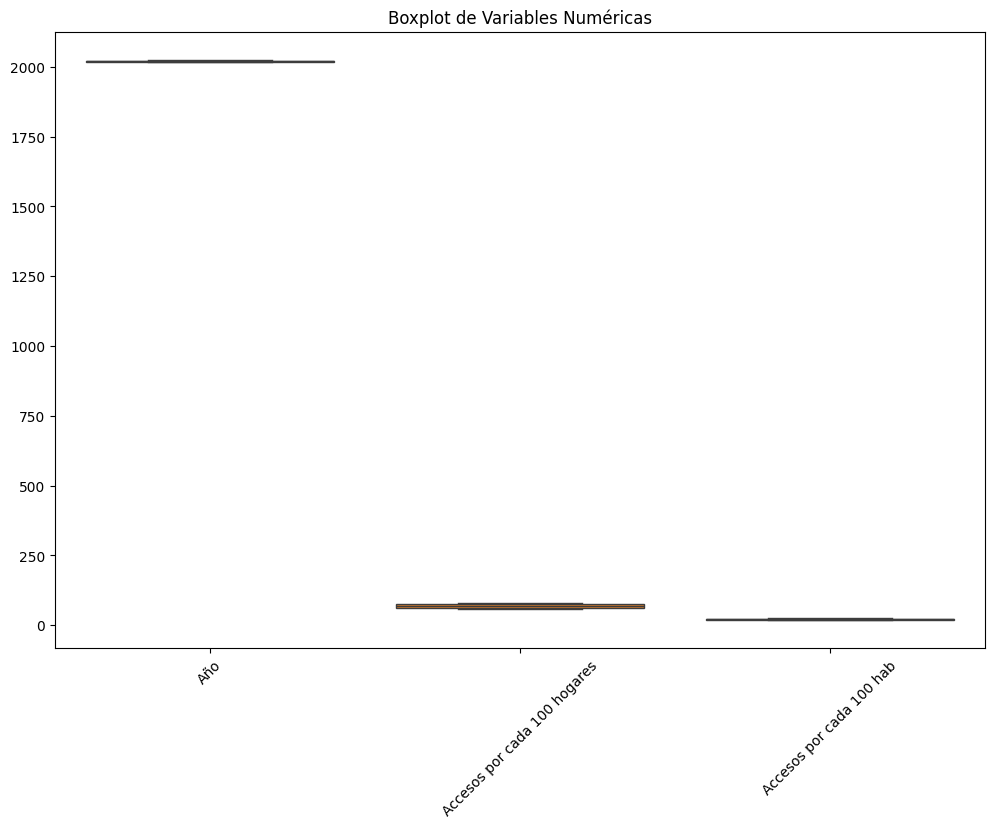

In [22]:
# Boxplot para cada columna numérica
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_Penetracion_totales.select_dtypes(include=['number']))
plt.title('Boxplot de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()


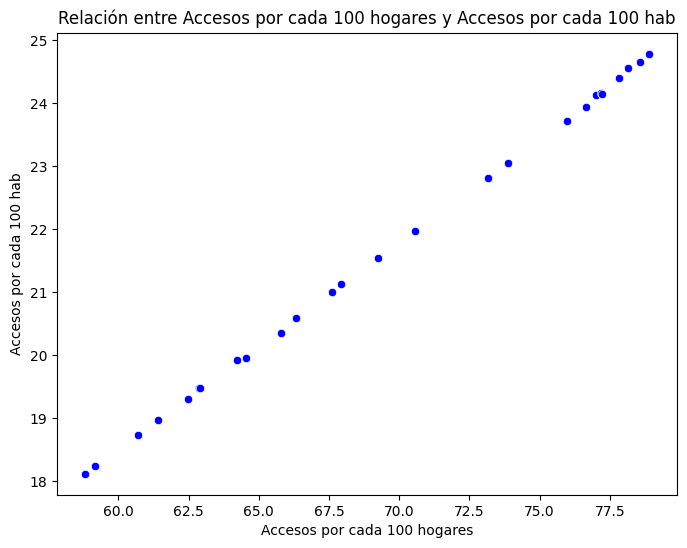

In [23]:
# Convertir `Trimestre` a cadena si es necesario
df_Penetracion_totales['Trimestre'] = df_Penetracion_totales['Trimestre'].astype(str)

# Graficar un scatterplot entre `Accesos por cada 100 hogares` y `Accesos por cada 100 hab`
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_Penetracion_totales,
    x='Accesos por cada 100 hogares',
    y='Accesos por cada 100 hab',
    color='blue'
)
plt.title('Relación entre Accesos por cada 100 hogares y Accesos por cada 100 hab')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Accesos por cada 100 hab')
plt.show()


In [24]:
# Sobrescribir el archivo original con las transformaciones realizadas
df_Penetracion_totales.to_csv(archivo_csv, index=False)

print(f"Las transformaciones se han guardado en el archivo original: {archivo_csv}")


Las transformaciones se han guardado en el archivo original: C:/Users/Usuario/PI_2/DATA_LIMPIO/Penetracion-totales.csv
